In [197]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from PIL import ImageDraw
sys.path.append('..')
from utilitaire.imgAiTrainer.imgAiTrainer import Trainer

tr = Trainer()

In [198]:
def show_sample(img):
  figure, axis = plt.subplots(1,1)
  axis.imshow(img)

In [199]:
def show_sample2(img,img2):
  figure, (axis1, axis2) = plt.subplots(1,2)
  axis1.imshow(img)
  axis2.imshow(img2)

In [200]:
model = keras.models.load_model('save/model/model')
model.load_weights('save/poids/model')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 120, 160, 3)

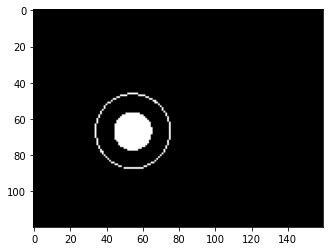

In [205]:
cercleT = tr.createCercle((800,600),True)

img = tf.keras.preprocessing.image.load_img("../../Assets/imgAiTrainer/cercle.png",target_size=(120,160))
img = keras.preprocessing.image.img_to_array(img)
show_sample(img)
imgIa = np.expand_dims(img, axis=0)
imgIa.shape

In [206]:
%%time
y_pred = model.predict(imgIa)

Wall time: 50.9 ms


In [207]:
print("Prédiction : ",y_pred)
print("Image : ",cercleT[0],cercleT[1],cercleT[2])

Prédiction :  [[-2.4603765  11.97726     9.711883    0.04263937]]
Image :  (275.5, 336.5) 57.5 104.5


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


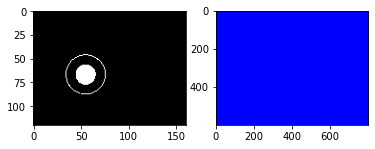

In [208]:
pred=y_pred[0]
imgIA = Image.new('RGBA', (800,600),"blue" )
draw = ImageDraw.Draw(imgIA)
draw.ellipse([round(pred[0]-pred[2]),round(pred[1]-pred[2]),round(pred[0]+pred[2]),round(pred[1]+pred[2])], fill = 'white', outline ='black', width=5)
draw.ellipse([round(pred[0]-pred[3]),round(pred[1]-pred[3]),round(pred[0]+pred[3]),round(pred[1]+pred[3])], fill = None, outline ='white', width=5)
imgPre = tf.keras.preprocessing.image.img_to_array(imgIA, data_format=None, dtype=None)
show_sample2(img,imgPre)